# XGBoost Gradient Boosted Tree Classifier

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
import xgboost
from secom import data

%matplotlib inline

DATA_PATH = "../../data"
RANDOM_STATE = 0

In [2]:
plt.rcParams['figure.figsize'] = (14.0, 10.0)

## Load Data and merge dataframes

In [3]:
vendor_data  = data.load_vendor_json(DATA_PATH, feature_engineer=True)
secom_labels = data.load_secom_features(DATA_PATH)
secom_data = data.load_secom_labels(DATA_PATH, feature_engineer=True, human_labels=False)

df = data.combine_data_sources(secom_data, secom_labels, vendor_data)

In [4]:
Y = df["s_label_target"]
X = df.drop("s_label_target", axis=1)

## Fit Classifier

In [37]:
clf = XGBClassifier(objective='binary:logistic',n_estimators=1000, n_jobs=-1, scale_pos_weight=.1, eval_metric="auc")

In [38]:
# Perform Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
cross_val_score(clf, X, Y, cv=cv, scoring=make_scorer(f1_score))

array([0.97966102, 0.96410256, 0.96598639, 0.97094017, 0.97260274])

### Test fit on 70 30 split manually

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,  shuffle=True)

In [40]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.1, seed=None, silent=True,
       subsample=1)

In [41]:
pred = clf.predict(X_test)

In [42]:
f1_score(pred, y_test)

0.9753363228699551

In [43]:
confusion_matrix(pred, y_test)

array([[ 14,   7],
       [ 15, 435]])

In [10]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)

json_sil_vendor_eee    0.047856
s_data_59              0.037923
s_data_67              0.017607
s_data_558             0.016704
s_data_519             0.015801
s_data_21              0.015801
s_data_75              0.013093
s_data_336             0.012641
s_data_32              0.011738
s_data_39              0.011738
s_data_488             0.011287
s_data_577             0.010835
s_data_433             0.010835
s_data_0               0.010835
s_data_103             0.009932
s_data_302             0.009932
s_data_311             0.009932
s_data_567             0.009932
s_data_323             0.009932
s_data_90              0.009481
s_data_287             0.009029
s_data_72              0.008578
s_data_511             0.008578
s_data_33              0.008578
s_data_146             0.008126
s_data_550             0.007675
s_data_571             0.007675
s_data_333             0.007675
s_data_19              0.007675
s_data_14              0.007675
                         ...   
s_data_2

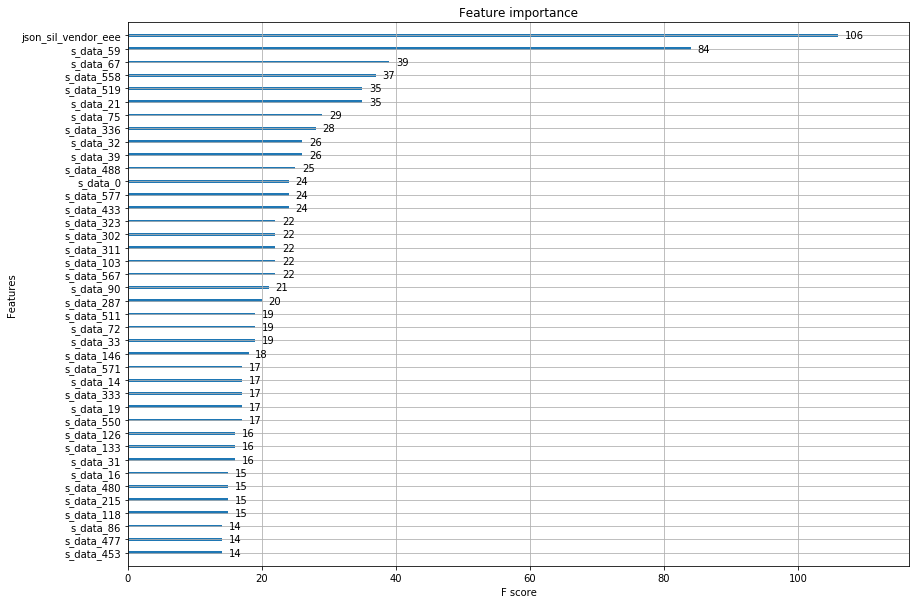

In [11]:
xgboost.plot_importance(clf, max_num_features=40, importance_type="weight")